## 1. Comparing classifiers. (65 points)

### TO DO : PLOT EACH FACTOR / SCATTER PLOTS AND OBSERVE DATA

### Part One (Divorce classification/prediction)

This dataset is about participants who completed the personal information form and a divorce pre-
dictors scale. The data is a modified version of the publicly available at https://archive.ics.uci.edu/ml/datasets/Divorce+Predictors+data+set (by injecting noise so you will not get the exactly
same results as on UCI website). The dataset marriage.csv is contained in the homework folder.
There are 170 participants and 54 attributes (or predictor variables) that are all real-valued. The last
column of the CSV file is label y (1 means \divorce", 0 means \no divorce"). Each column is for one
feature (predictor variable), and each row is a sample (participant). A detailed explanation for each
feature (predictor variable) can be found at the website link above. Our goal is to build a classier
using training data, such that given a test sample, we can classify (or essentially predict) whether its
label is 0 (\no divorce") or 1 (\divorce").
We are going to compare the following classifiers (Naive Bayes, Logistic Regression, and KNN).
Use the first 80% data for training and the remaining 20% for testing. If you use scikit-learn you can
use train test split to split the dataset.

### (a) Report testing accuracy for each of the three classifiers. Comment on their performance: which performs the best and make a guess why they perform the best in this setting.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB
import scipy.sparse.linalg as ll
import math
import scipy.io
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option("display.max_columns", None)
data = pd.read_csv('data/marriage.csv',header=None)

#### Viewing the data structure(rows and columns) 

In [3]:
data.shape

(170, 55)

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,1.560903,3.681587,3.450467,3.211998,-1.203045,0.597706,-0.970093,-0.750970,-0.511495,-0.133660,0.125260,-1.406250,0.758918,0.306529,-0.988581,0.004265,1.043944,-0.487548,-0.931616,2.240939,1.793689,-0.374831,-0.119248,0.725669,-0.702825,0.093832,0.826932,0.213975,-0.176350,0.383635,-0.097863,-1.109079,1.706203,2.236392,-0.117864,-0.102429,2.535425,2.192602,3.411123,3.533603,1.584849,2.159497,1.723109,2.111179,3.357714,2.077401,1.184182,3.955069,2.608046,2.303629,1.721660,3.275018,1.761019,1.215237,1.0
1,4.153272,5.173858,4.100690,2.580173,3.305788,-1.505512,-0.029398,5.702657,2.230281,4.975496,3.379980,3.391024,5.966685,-1.066399,4.541707,3.444310,6.059895,3.068480,3.454996,0.647083,1.409066,0.644739,-1.099385,2.746316,3.400269,1.000304,3.236315,0.196056,1.173657,1.481821,-0.560921,4.359797,2.134352,3.319091,0.303575,1.763457,3.701125,2.439751,2.487661,4.495309,1.605683,2.240530,3.177468,2.987640,3.840590,3.467076,2.451984,3.504294,5.324240,4.480607,5.375248,2.270379,2.167944,2.191214,1.0
2,2.226241,1.575322,2.389117,2.725405,-0.304562,2.832803,1.787779,0.565755,1.328212,2.335353,3.069317,3.967077,2.523991,2.355431,4.093706,2.408087,2.565686,2.346341,1.272065,0.706672,1.734569,-0.467775,1.082733,1.739763,1.075277,2.977309,2.646243,2.061383,2.703898,2.163653,5.212282,1.956754,-0.096174,-0.359848,0.306612,1.341966,3.739578,0.413153,1.945750,3.324730,2.719122,3.247889,0.995859,4.279117,2.941032,1.200917,1.241794,2.207492,1.228034,0.870052,1.685040,2.341985,-0.444320,2.527452,1.0
3,3.553458,2.859042,2.928414,1.833241,1.271119,4.165213,2.078597,4.506175,2.521628,2.747315,3.733626,3.143787,3.846514,4.068012,4.435790,1.981512,2.109497,3.702335,2.948674,3.398297,-0.377365,2.693987,-0.049509,0.814895,2.335639,2.112954,0.721823,2.644688,2.488193,3.306455,2.172635,2.613589,1.459333,2.592534,-0.097476,1.207597,3.886239,3.675549,3.459571,3.458220,2.290591,2.315354,2.708638,1.367546,2.594346,3.196291,2.204824,3.664982,3.689508,2.577677,3.171884,2.164660,1.813024,1.376033,1.0
4,0.506547,1.419223,1.716153,1.319274,2.853840,0.047412,-0.016515,0.620795,1.202992,0.078347,0.627483,2.475966,2.311646,0.652700,-0.135332,2.516557,1.478156,0.658082,3.881507,-0.334515,0.477037,-0.762517,1.080497,-1.690616,-1.004492,2.728781,0.907220,2.419376,1.316053,-0.534444,-0.042019,2.077728,0.330229,-0.287137,1.871093,-2.645264,-0.018694,-1.082132,3.609437,1.818820,-0.492958,-0.103705,2.203423,-1.717672,1.889684,1.806657,2.085539,2.012551,1.899477,1.510134,1.373350,2.551119,0.846321,-0.066858,1.0


#### Moving the response variable to a different dataset

In [5]:
Y = data[54]
X = data.iloc[:,0:54]

#### Exploratory Data Analysis

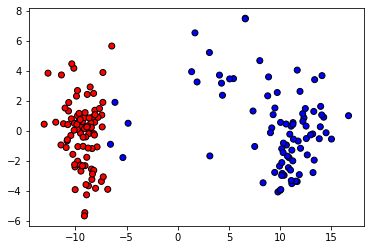

In [6]:
## Performing a PCA and plotting the two principal components of data 
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X_r[:,0],X_r[:,1],c=Y, cmap=cm_bright,edgecolors='k')

#### Splitting the data sets into test/train (80%train and 20% test)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=16)

print("Number of training data points: ", len(x_train))
print("Number of testing data points: ", len(x_test))

Number of training data points:  136
Number of testing data points:  34


#### Logistic Regression

In [8]:
## Fitting a logistic Regression on the dataset and measuring accuracy

logit = LogisticRegression()
logit.fit(x_train,y_train)

## using the model to predict results on test dataset
predicted_logit = logit.predict(x_test)

## Get the accuracy of the predictions. It is defined as #correctly predicted/Total number of observations of the test data
score = logit.score(x_test, y_test)

## Another method to check score
score2 = sum(predicted_logit == y_test)/len(y_test)

print("Testing accuracy for Logistic Regression : ", score)

Testing accuracy for Logistic Regression :  0.9705882352941176


In [13]:
print(confusion_matrix(y_test,predicted_logit))
print(classification_report(y_test,predicted_logit))

[[20  0]
 [ 1 13]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98        20
         1.0       1.00      0.93      0.96        14

    accuracy                           0.97        34
   macro avg       0.98      0.96      0.97        34
weighted avg       0.97      0.97      0.97        34



#### K Nearest Neighbors Classification (KNN)

In [11]:
for k in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)

    score = knn.score(x_test, y_test)

    print("Accuracy of Knn for neighbors ", k, " is : ", score)

Accuracy of Knn for neighbors  1  is :  0.9705882352941176
Accuracy of Knn for neighbors  2  is :  0.9705882352941176
Accuracy of Knn for neighbors  3  is :  0.9705882352941176
Accuracy of Knn for neighbors  4  is :  0.9705882352941176
Accuracy of Knn for neighbors  5  is :  0.9705882352941176
Accuracy of Knn for neighbors  6  is :  0.9705882352941176
Accuracy of Knn for neighbors  7  is :  0.9705882352941176
Accuracy of Knn for neighbors  8  is :  0.9705882352941176
Accuracy of Knn for neighbors  9  is :  0.9705882352941176
Accuracy of Knn for neighbors  10  is :  0.9705882352941176
Accuracy of Knn for neighbors  11  is :  0.9705882352941176
Accuracy of Knn for neighbors  12  is :  0.9705882352941176
Accuracy of Knn for neighbors  13  is :  0.9705882352941176
Accuracy of Knn for neighbors  14  is :  0.9705882352941176
Accuracy of Knn for neighbors  15  is :  0.9705882352941176
Accuracy of Knn for neighbors  16  is :  0.9705882352941176
Accuracy of Knn for neighbors  17  is :  0.970588

In [16]:
print(confusion_matrix(y_test,knn.predict(x_test)))

[[20  0]
 [ 1 13]]


#### Iterating through various k values give the same accuracy, so we can go for a small k-value to make it computationally efficient.

#### Naive Bayes Classifier

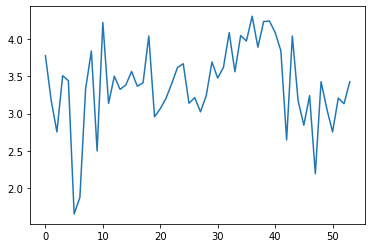

In [12]:
plt.plot(pd.DataFrame(x_train).var())

##### The data does not suffer from variance that is close to 0. Hence there is no need to manually set the variance before fitting Naive Bayes.

In [18]:
nb = GaussianNB(var_smoothing=0.001)
nb.fit(x_train,y_train)

score = nb.score(x_test, y_test)

print("Accuracy of Naive Bayes Classifier is : ", score)
print(confusion_matrix(y_test,nb.predict(x_test)))

Accuracy of Naive Bayes Classifier is :  0.9705882352941176
[[20  0]
 [ 1 13]]


### (b) Now perform PCA to project the data into two-dimensional space. Build the classifiers (Naive Bayes, Logistic Regression, and KNN) using the two-dimensional PCA results. Plot the data points and decision boundary of each classifier in the two-dimensional space. Comment on the difference between the decision boundary for the three classifiers. Please clearly represent the data points with different labels using different colors.

In [19]:
print(data.shape)

Y = data[54]
X = data.iloc[:,0:54]

(170, 55)


In [20]:
## PCA on data with 54 features to extract the top 2 principal components.
'''
x_np = X.to_numpy()

m, n = x_np.shape

print("Original data matrix ", (m,n))

mu = np.mean(x_np.T,axis=0)
xc = (x_np.T - mu[None,:])

C = np.dot(xc,xc.T)/m
print("Covariance Matrix is : ", C.shape)
K = 2
S,W = ll.eigs(C,k = K)
S = S.real
W = W.real

x_1 = np.dot(W[:,0].T,xc)/math.sqrt(S[0]) # extract 1st eigenvalues
x_2 = np.dot(W[:,1].T,xc)/math.sqrt(S[1]) # extract 2nd eigenvalue

x_pca = np.concatenate((x_1.reshape(-1,1),x_2.reshape(-1,1)), axis=1)
print("Shape of data matrix after PCA : ", x_pca.shape)

## COnverting data to a Dataframe 
x_pca_df = pd.DataFrame(x_pca, columns = ['PC1', 'PC2'])
'''

'\nx_np = X.to_numpy()\n\nm, n = x_np.shape\n\nprint("Original data matrix ", (m,n))\n\nmu = np.mean(x_np.T,axis=0)\nxc = (x_np.T - mu[None,:])\n\nC = np.dot(xc,xc.T)/m\nprint("Covariance Matrix is : ", C.shape)\nK = 2\nS,W = ll.eigs(C,k = K)\nS = S.real\nW = W.real\n\nx_1 = np.dot(W[:,0].T,xc)/math.sqrt(S[0]) # extract 1st eigenvalues\nx_2 = np.dot(W[:,1].T,xc)/math.sqrt(S[1]) # extract 2nd eigenvalue\n\nx_pca = np.concatenate((x_1.reshape(-1,1),x_2.reshape(-1,1)), axis=1)\nprint("Shape of data matrix after PCA : ", x_pca.shape)\n\n## COnverting data to a Dataframe \nx_pca_df = pd.DataFrame(x_pca, columns = [\'PC1\', \'PC2\'])\n'

In [21]:
## Performing PCA on data

pca = PCA(n_components=2)
x_pca = pca.fit(X).transform(X)

#### Splitting the data after PCA into test and train datasets

In [37]:
## Splitting the data sets into test/train (80%train and 20% test)

x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca,Y, test_size=0.20, random_state=24)

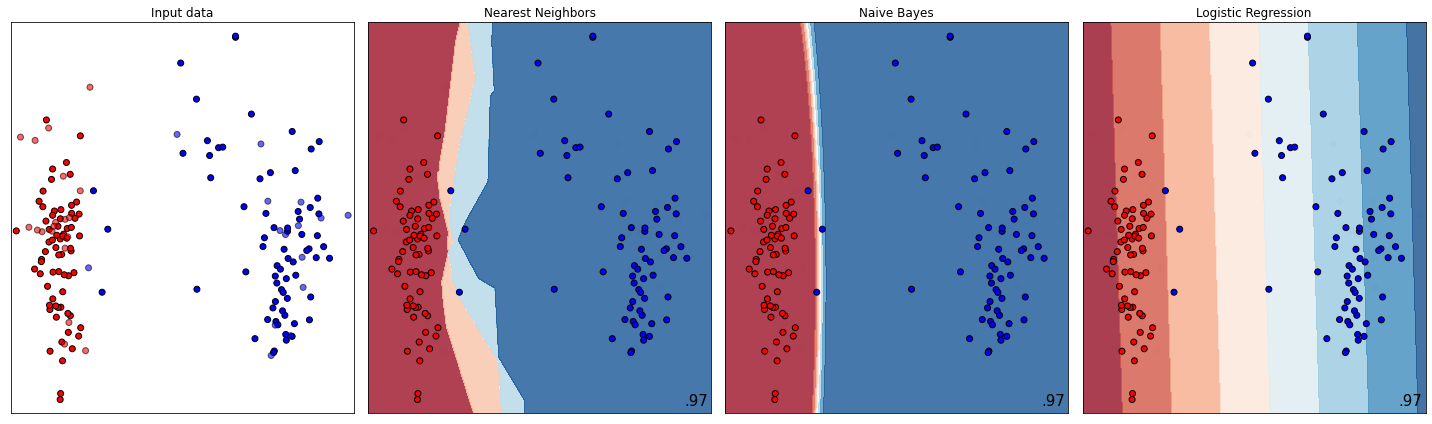

In [38]:
## Building classifiers and plotting results for this data using Logistic Regression, Naive Bayes and KNN
h = .02
x_min, x_max = x_pca[:, 0].min() - .5, x_pca[:, 0].max() + .5
y_min, y_max = x_pca[:, 1].min() - .5, x_pca[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
i = 1

classifiers = [
    KNeighborsClassifier(3),
    GaussianNB(),
    LogisticRegression()]
names = ["Nearest Neighbors", "Naive Bayes", "Logistic Regression"]

score_lst = []

figure = plt.figure(figsize=(20, 6))
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(1, len(classifiers) + 1, i)
#ax = plt.subplot(1,1,1)
ax.set_title("Input data")
# Plot the training points
ax.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train_pca, cmap=cm_bright,edgecolors='k')
# Plot the testing points
ax.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=y_test_pca, cmap=cm_bright, alpha=0.6,edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
i += 1

for name,clf in zip(names,classifiers):
    ax = plt.subplot(1, len(classifiers) + 1, i)
    clf.fit(x_train_pca, y_train_pca)
    score = clf.score(x_test_pca, y_test_pca)
    score_lst.append((name, score))
    
    # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    
    # Plot the training points
    ax.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train_pca, cmap=cm_bright,
                   edgecolors='k')
    # Plot the testing points
    ax.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=y_test_pca, cmap=cm_bright,
                   edgecolors='k', alpha=0.01)
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    ax.set_title(name)
    
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),size=15, horizontalalignment='right')
    
    i += 1

plt.tight_layout()
plt.show()

In [40]:
score_lst

[('Nearest Neighbors', 0.9705882352941176),
 ('Naive Bayes', 0.9705882352941176),
 ('Logistic Regression', 0.9705882352941176)]

### Part Two (Handwritten digits classification).


This question is to compare different classifiers and their performance for multi-class classifications
on the complete MNIST dataset at http://yann.lecun.com/exdb/mnist/. You can find the data
file mnist 10digits.mat in the homework folder. The MNIST database of handwritten digits has a
training set of 60,000 examples, and a test set of 10,000 examples. We will compare KNN, logistic
regression, SVM, kernel SVM, and neural networks.

• We suggest you to \standardize" the features before training the classifiers, by dividing the values
of the features by 255 (thus map the range of the features from [0, 255] to [0, 1]).

• You may adjust the number of neighbors K used in KNN to have a reasonable result (you may
use cross validation but it is not required; any reasonable tuning to get good result is acceptable).

• You may use a neural networks function sklearn.neural network with hidden layer sizes = (20, 10).

• For kernel SVM, you may use radial basis function kernel and choose proper kernel.

• For KNN and SVM, you can randomly downsample the training data to size m = 5000, to improve
computation efficiency.

Train the classifiers on training dataset and evaluate on the test dataset.

### (a) Report confusion matrix, precision, recall, and F-1 score for each of the classifiers. For precision, recall, and F-1 score of each classifier, we will need to report these for each of the digits. So you can create a table for this. For this question, each of the 5 classifier, KNN, logistic regression, SVM, kernel SVM, and neural networks, accounts for 10 points.

In [41]:
## Reading the data
mnist_x_train = scipy.io.loadmat('data/mnist_10digits.mat')['xtrain']
mnist_x_test = scipy.io.loadmat('data/mnist_10digits.mat')['xtest']
mnist_y_train = scipy.io.loadmat('data/mnist_10digits.mat')['ytrain']
mnist_y_train = mnist_y_train.T.flatten()
mnist_y_test = scipy.io.loadmat('data/mnist_10digits.mat')['ytest']
mnist_y_test = mnist_y_test.flatten()

print("Dimensions of train data features: ", mnist_x_train.shape)
print("Dimensions of test data features: ", mnist_x_test.shape)
print("Dimensions of train data target: ", mnist_y_train.shape)
print("Dimensions of test data target: ", mnist_y_test.shape)

Dimensions of train data features:  (60000, 784)
Dimensions of test data features:  (10000, 784)
Dimensions of train data target:  (60000,)
Dimensions of test data target:  (10000,)


In [42]:
## Visualizing the data for one image
mnist_x_train[0,:]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [43]:
## Standardizing the data from 0 to 1
mnist_x_train_std = mnist_x_train/255
mnist_x_test_std = mnist_x_test/255

In [44]:
## Viewing the standardlized data
len(mnist_x_train_std[0,:])

784

#### Logistic Regression on MNIST

In [85]:
## Fitting a logistic Regression on the dataset and measuring accuracy
import time

start = time.time()
logit = LogisticRegression(solver='liblinear')
logit.fit(mnist_x_train_std,mnist_y_train)
end = time.time()
## using the model to predict results on test dataset
predicted_logit = logit.predict(mnist_x_test_std)

## Get the accuracy of the predictions. It is defined as #correctly predicted/Total number of observations of the test data
score = logit.score(mnist_x_test_std, mnist_y_test)

## Another method to check score
score2 = sum(predicted_logit == mnist_y_test)/len(mnist_y_test)

print("Time elapsed :", end-start)
print("Testing accuracy for Logistic Regression : ", score)
print(classification_report(mnist_y_test,predicted_logit))
print(confusion_matrix(mnist_y_test,predicted_logit))

Time elapsed : 144.4218361377716
Testing accuracy for Logistic Regression :  0.9201
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.94      0.89      0.91      1032
           3       0.89      0.91      0.90      1010
           4       0.92      0.93      0.93       982
           5       0.89      0.86      0.88       892
           6       0.94      0.95      0.94       958
           7       0.93      0.92      0.93      1028
           8       0.87      0.88      0.87       974
           9       0.90      0.89      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

[[ 960    0    1    2    0    5    6    3    1    2]
 [   0 1112    3    1    0    1    5    1   12    0]
 [   8    8  920   20    9    5   10   11   37    4

#### Down Sampling data randomly to 5000 data points

In [77]:
data_0 = mnist_x_train[np.random.choice(np.where(mnist_y_train == 0)[0], size=500)]
data_0 = np.concatenate((data_0,np.array([0]*len(data_0)).reshape(-1,1)),axis=1)

data_1 = mnist_x_train[np.random.choice(np.where(mnist_y_train == 1)[0], size=500)]
data_1 = np.concatenate((data_1,np.array([1]*len(data_1)).reshape(-1,1)),axis=1)

data_2 = mnist_x_train[np.random.choice(np.where(mnist_y_train == 2)[0], size=500)]
data_2 = np.concatenate((data_2,np.array([2]*len(data_2)).reshape(-1,1)),axis=1)

data_3 = mnist_x_train[np.random.choice(np.where(mnist_y_train == 3)[0], size=500)]
data_3 = np.concatenate((data_3,np.array([3]*len(data_3)).reshape(-1,1)),axis=1)

data_4 = mnist_x_train[np.random.choice(np.where(mnist_y_train == 4)[0], size=500)]
data_4 = np.concatenate((data_4,np.array([4]*len(data_4)).reshape(-1,1)),axis=1)

data_5 = mnist_x_train[np.random.choice(np.where(mnist_y_train == 5)[0], size=500)]
data_5 = np.concatenate((data_5,np.array([5]*len(data_5)).reshape(-1,1)),axis=1)

data_6 = mnist_x_train[np.random.choice(np.where(mnist_y_train == 6)[0], size=500)]
data_6 = np.concatenate((data_6,np.array([6]*len(data_6)).reshape(-1,1)),axis=1)

data_7 = mnist_x_train[np.random.choice(np.where(mnist_y_train == 7)[0], size=500)]
data_7 = np.concatenate((data_7,np.array([7]*len(data_7)).reshape(-1,1)),axis=1)

data_8 = mnist_x_train[np.random.choice(np.where(mnist_y_train == 8)[0], size=500)]
data_8 = np.concatenate((data_8,np.array([8]*len(data_8)).reshape(-1,1)),axis=1)

data_9 = mnist_x_train[np.random.choice(np.where(mnist_y_train == 9)[0], size=500)]
data_9 = np.concatenate((data_9,np.array([9]*len(data_9)).reshape(-1,1)),axis=1)

## Creating a final dataset

data_sampled = np.concatenate((data_0,data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8,data_9))
data_sampled.shape

(5000, 785)

In [78]:
y_sampled = data_sampled[:,784]
x_sampled = data_sampled[:,0:784]/255

#### Neural Network on MNIST

In [79]:
#nn = MLPClassifier(hidden_layer_sizes = (20,10))
import time

start = time.time()
nn = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(20, 10), random_state=1).fit(mnist_x_train_std, mnist_y_train)
#nn.fit(mnist_x_train_std,mnist_y_train)
end = time.time()

score = nn.score(mnist_x_test_std, mnist_y_test)
print("Test Accuracy is : ", score)

predicted_nn = nn.predict(mnist_x_test_std)

print("Time elapsed :", end-start)
print(classification_report(mnist_y_test,predicted_nn))
print(confusion_matrix(mnist_y_test,predicted_nn))

c:\users\gmadh\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Test Accuracy is :  0.9544
Time elapsed : 122.30229115486145
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       980
           1       0.97      0.98      0.98      1135
           2       0.96      0.95      0.95      1032
           3       0.94      0.94      0.94      1010
           4       0.96      0.96      0.96       982
           5       0.94      0.93      0.93       892
           6       0.96      0.97      0.96       958
           7       0.96      0.94      0.95      1028
           8       0.95      0.93      0.94       974
           9       0.94      0.94      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

[[ 962    0    1    0    0    6    5    4    2    0]
 [   0 1113    2    4    0    1    5    1    8    1]
 [   6    5  985   11    4    5    3    6    6    1]
 [   0    3   12  947

#### KNN on Sampled Data Set

In [80]:
import time

start = time.time()
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_sampled,y_sampled)
end = time.time()

score = knn.score(mnist_x_test_std, mnist_y_test)
print("Time elapsed :", end-start)
print("Test Accuracy is : ", score)

predicted_knn = knn.predict(mnist_x_test_std)

print(classification_report(mnist_y_test,predicted_knn))
print(confusion_matrix(mnist_y_test,predicted_knn))

Time elapsed : 0.013276338577270508
Test Accuracy is :  0.9356
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.90      1.00      0.95      1135
           2       0.96      0.91      0.93      1032
           3       0.93      0.93      0.93      1010
           4       0.94      0.92      0.93       982
           5       0.92      0.94      0.93       892
           6       0.96      0.97      0.97       958
           7       0.94      0.92      0.93      1028
           8       0.97      0.87      0.91       974
           9       0.90      0.92      0.91      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

[[ 964    1    2    1    0    2    9    1    0    0]
 [   0 1130    2    1    0    0    2    0    0    0]
 [  18   34  934    5    2    0    8   18   13    0]
 [   0    9   11  9

#### SVM Linear Classifier

In [81]:
import time

start = time.time()
svm_l = SVC(kernel="linear")
svm_l.fit(x_sampled,y_sampled)
end = time.time()

score = svm_l.score(mnist_x_test_std, mnist_y_test)
print("Test Accuracy is : ", score)

predicted_svm = svm_l.predict(mnist_x_test_std)

print("Time elapsed :", end-start)
print(classification_report(mnist_y_test,predicted_svm))
print(confusion_matrix(mnist_y_test,predicted_svm))

Test Accuracy is :  0.9146
Time elapsed : 3.363464593887329
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.89      0.92      0.91      1032
           3       0.90      0.88      0.89      1010
           4       0.91      0.94      0.92       982
           5       0.87      0.88      0.88       892
           6       0.94      0.94      0.94       958
           7       0.92      0.91      0.91      1028
           8       0.90      0.83      0.87       974
           9       0.90      0.87      0.88      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

[[ 960    0    4    2    0    5    7    1    1    0]
 [   0 1113    3    4    1    2    2    1    9    0]
 [   8    5  949    8   13    2   13   10   22    2]
 [   5    1   23  891 

#### SVM Kernel Classifier

In [82]:
import time

start = time.time()
svm_k = SVC(kernel="rbf")
svm_k.fit(x_sampled,y_sampled)
end = time.time()

score = svm_k.score(mnist_x_test_std, mnist_y_test)
print("Test Accuracy is : ", score)

predicted_svm_k = svm_k.predict(mnist_x_test_std)

print("Time elapsed :", end-start)
print(classification_report(mnist_y_test,predicted_svm_k))
print(confusion_matrix(mnist_y_test,predicted_svm_k))

Test Accuracy is :  0.9548
Time elapsed : 7.22681736946106
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.95      0.94      0.95      1032
           3       0.96      0.95      0.95      1010
           4       0.94      0.96      0.95       982
           5       0.94      0.96      0.95       892
           6       0.96      0.97      0.97       958
           7       0.96      0.93      0.94      1028
           8       0.94      0.93      0.93       974
           9       0.95      0.93      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

[[ 968    0    2    1    0    4    3    1    1    0]
 [   0 1118    3    2    1    1    3    0    6    1]
 [   8    0  975    4    6    1    7   11   18    2]
 [   0    0   10  959  

##### Some Exploratory Analysis on the data

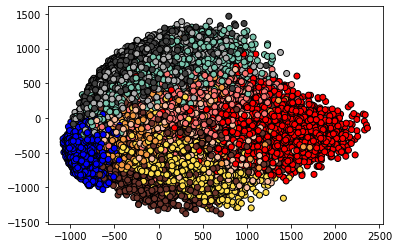

In [63]:
## Performing a PCA and plotting the two principal components of data 
pca = PCA(n_components=2)
X_r = pca.fit(mnist_x_train).transform(mnist_x_train)

cm_bright = ListedColormap(['#FF0000', '#0000FF', '#6e352c', '#ffdd50', '#7bc5ae', '#fac0a2', '#fe7773', '#424242','#f59a44', '#afafaf'])
plt.scatter(X_r[:,0],X_r[:,1],c=mnist_y_train, cmap=cm_bright,edgecolors='k')